In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import drone
from matplotlib import pyplot as plt

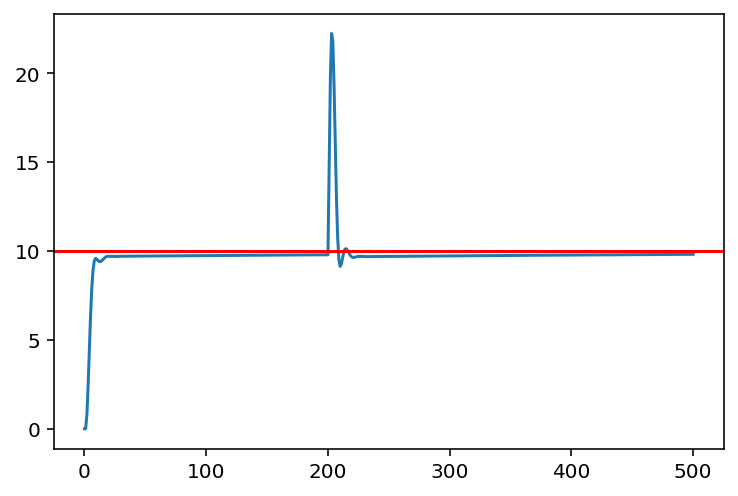

In [45]:
env = drone.DroneEnv(gravity=-2)
observations = []
actions = []
obs = env.reset()
last_error = None
integral = 0
for i in range(500):
    observations.append(obs)
    error = env.goal - obs # how far you are from the goal
    integral += error
    diff = error - last_error if last_error is not None else 0
    kp = 5
    ki = 0.01
    kd = 25.
    action = kp*error + kd*diff + ki*integral
    actions.append(action)
    last_error = error
    if i == 200:
        env.v = 5
    env.render()
    
    obs, _, _, _ = env.step(action)
observations.append(obs)
env.close()
plt.plot(observations)
plt.axhline(env.goal, color='red')

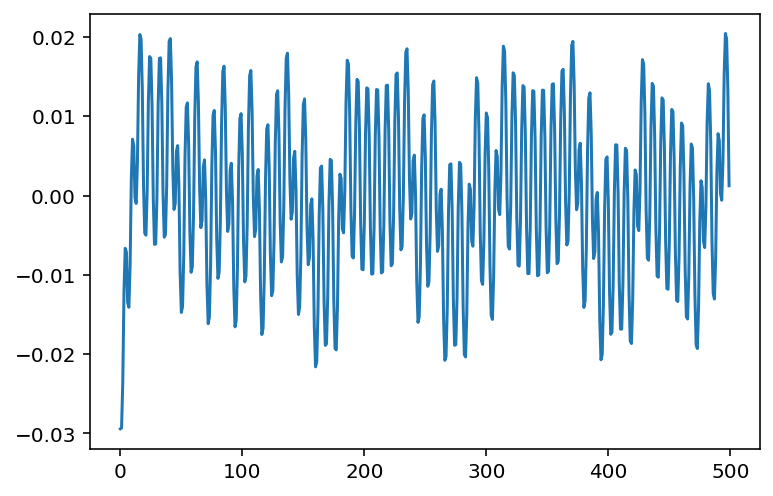

In [56]:
import gym
env = gym.make('CartPole-v0').env
observation = env.reset()
angles = []
observations = [observation]
last_error = None
integral = 0
for t in range(500):
    env.render()
    action = env.action_space.sample()
    #print(observation)
    angle = observation[2]
    error = angle - 0
    integral += error
    diff = 0 if last_error is None else error - last_error
    kp=1
    ki=0
    kd=10
    action = kp*error + kd*diff + ki*integral
    action = int((action/abs(action) + 1)/2) # 0 left 1 right
    angles.append(angle)
    last_error = error
    #print(angle)
    observation, reward, done, info = env.step(action)
    
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
plt.plot(angles)